In [1]:
#importacion de libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carga de datasets
#Le especifico el tipo a algunas columnas porque sino me tira un warning, podria especificar el verdadero tipo tambien
todoSet = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv",\
                   dtype = {3: object,5: object,
                    6: object,7: object,
                    8: object,9: object,
                    10: object,11: object,
                    12: object,13: object,
                    14: object,15: object,
                    16: object,17: object,
                    18: object,19: object,
                    20: object,21: object,
                    22: object})
trainSet = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/labels_training_set.csv")
usersJunioSet = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv")

In [3]:
todoSet.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
trainSet.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [5]:
usersJunioSet.head()

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


In [6]:
todoSet.dtypes

timestamp                    object
event                        object
person                       object
url                          object
sku                         float64
model                        object
condition                    object
storage                      object
color                        object
skus                         object
search_term                  object
staticpage                   object
campaign_source              object
search_engine                object
channel                      object
new_vs_returning             object
city                         object
region                       object
country                      object
device_type                  object
screen_resolution            object
operating_system_version     object
browser_version              object
dtype: object

In [7]:
#conversion de Object a datetime
todoSet['timestamp'] = pd.to_datetime(todoSet['timestamp'])

# Feature Engineering

In [8]:
#Comienzo buscando features sobre la cantidad de eventos por usuario

In [9]:
#Me quedo con los usuarios que convirtieron en junio(los de train)
usersTrain = todoSet[todoSet['person'].isin(trainSet['person'])].sort_values(by = 'timestamp')

In [10]:
#Creo una columna con solo fecha sin tiempo
usersTrain['fecha'] = usersTrain['timestamp'].dt.date

In [11]:
# 1er feature: Cantidad de eventos por usuario
eventosPorUserTrain = usersTrain.groupby(['fecha','person'])['event'].size()
eventosPorUserTrain = pd.DataFrame(data = eventosPorUserTrain)\
                        .rename(columns = {'event' : 'cantEventos'})

In [12]:
eventosPorFechaTrain = eventosPorUserTrain.sort_values(by = ['fecha','person']).reset_index()
eventosPorFechaTrain.head()

,fecha,person,cantEventos
0,2018-01-01,53a01f1e,16
1,2018-01-01,7c7e0de9,3
2,2018-01-01,8af11dbc,114
3,2018-01-02,050f1a22,20
4,2018-01-02,08343c0e,10


In [13]:
#Creo la columna con el feature en el set de train y lo agrego a un nuevo df
copiaTrain = trainSet
mergeTrain = pd.merge(eventosPorFechaTrain,copiaTrain, on = 'person', how= 'inner').sort_values(by='fecha')
mergeTrain.head()

,fecha,person,cantEventos,label
0,2018-01-01,53a01f1e,16,0
56,2018-01-01,8af11dbc,114,1
45,2018-01-01,7c7e0de9,3,0
310,2018-01-02,e6e5135d,16,0
301,2018-01-02,dbf6b08a,10,0


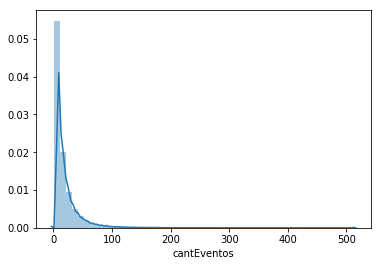

In [14]:
sns.distplot(mergeTrain['cantEventos']);

In [15]:
#Transformo a log para tener datos que parecen tener distribucion normal (?)
mergeTrain['cantEventos'] = np.log(mergeTrain['cantEventos'])
orderedByDate = mergeTrain[['person','cantEventos','label']]
mergeTrain.head()

,fecha,person,cantEventos,label
0,2018-01-01,53a01f1e,2.772589,0
56,2018-01-01,8af11dbc,4.736198,1
45,2018-01-01,7c7e0de9,1.098612,0
310,2018-01-02,e6e5135d,2.772589,0
301,2018-01-02,dbf6b08a,2.302585,0


In [16]:
orderedByDate.head()

,person,cantEventos,label
0,53a01f1e,2.772589,0
56,8af11dbc,4.736198,1
45,7c7e0de9,1.098612,0
310,e6e5135d,2.772589,0
301,dbf6b08a,2.302585,0


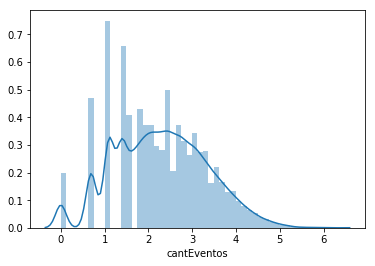

In [17]:
sns.distplot(orderedByDate['cantEventos']);

In [18]:
#split en x e y
X,y = orderedByDate.iloc[:,:-1].values, orderedByDate.iloc[:,-1].values

In [19]:
#Deberia aplicar algun algoritmo de encoding a la columna 'person'

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Me creo una instancia de LabelEncoder para codificar a numero la variable person, la sintaxis es la siguiente:
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])

# Debo utilizar onehotEncoder para evitar confundir a nuestro modelo, con solo labelEncoder puede pensar
# que una columna tiene datos con algún tipo de orden o jerarquía, cuando claramente no lo tiene
# Creo una instancia:
onehotencoder = OneHotEncoder(categorical_features = [1])
#Aplico la transformacion
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 0:]

In [22]:
#Split
train_size  =  int ( len ( X )  *  0.70) 
test_size = int ( len (y) * 0.70)
X_train ,  X_test  =  X [ 0 : train_size ] ,  X [ train_size : len ( X ) ] 
y_train , y_test = y [ 0 : test_size ] , y [ test_size : len ( y ) ]

In [25]:
# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

0.9125535862706176